In [35]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Set a seed
seed = np.random.seed(42)


# Data Loading

In [36]:
train_df = pd.read_csv('1_Data/Raw_Data/train_preprocessed.csv')
test_df = pd.read_csv('1_Data/Raw_Data/test_preprocessed.csv')
dev_df = pd.read_csv('1_Data/Raw_Data/dev_preprocessed.csv')

In [37]:
train_df.head()

,text,label,Preprocessed
0,The project will make a significant contributi...,1,"['project', 'make', 'significant', 'contributi..."
1,"So in -- first of all, the segments, we are --...",0,"['first', 'segment', 'selective', 'past']"
2,Building a smarter and stronger energy grid th...,0,"['building', 'smarter', 'stronger', 'energy', ..."
3,"Generally, first of all our Transmission depar...",0,"['generally', 'first', 'transmission', 'depart..."
4,"But for the most part, our challenge is showin...",0,"['part', 'challenge', 'showing', 'fund', 'work..."


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Preprocessed'])
y_train = train_df['label']

# Logistic Regression Model

In [39]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

print(f'Train Accuracy: {model.score(X_train, y_train)}')


X_test_vec = vectorizer.transform(test_df['Preprocessed'])
y_test = test_df['label']
print(f'Test Accuracy: {model.score(X_test_vec, y_test)}')

#Predict on dev set
X_dev_vec = vectorizer.transform(dev_df['Preprocessed'])
y_dev = dev_df['label']
print(f'Dev Accuracy: {model.score(X_test_vec, y_dev)}')



Train Accuracy: 0.9982062780269059
Test Accuracy: 0.8566037735849057
Dev Accuracy: 0.6264150943396226


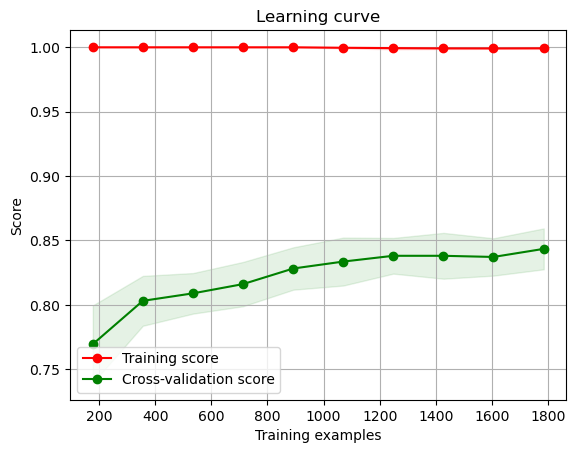

In [40]:
#Print the learning curve
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve')
plt.legend(loc='best')
plt.grid()
plt.show()

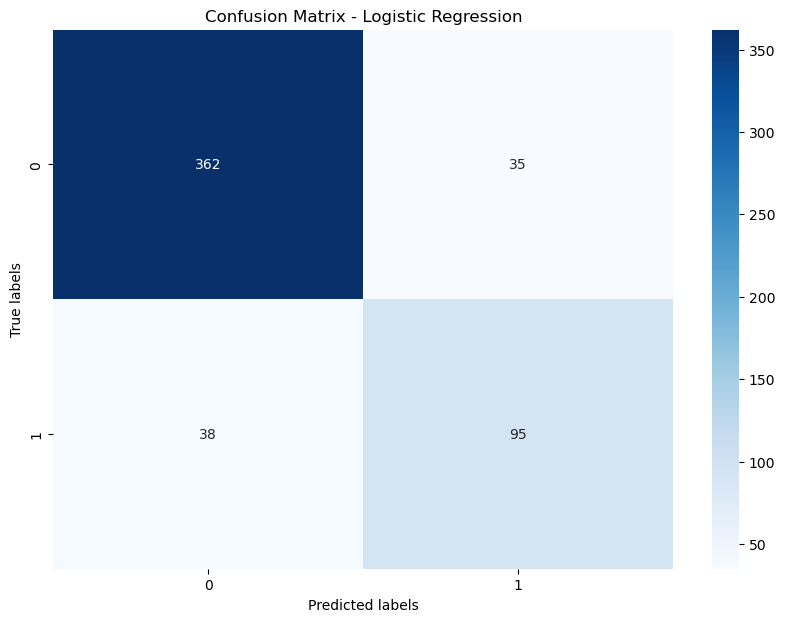

In [41]:
# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Merge X_test and X_dev into one
X_dev_vec = X_dev_vec[:X_test_vec.shape[0]]
X_eval = np.concatenate((X_test_vec.toarray(), X_dev_vec.toarray()), axis=0)
y_eval = np.concatenate((test_df['label'], dev_df['label']), axis=0)

y_pred = model.predict(X_eval)
cm = confusion_matrix(y_eval, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute overall accuracy
accuracy = accuracy_score(y_eval, y_pred)

# Compute precision, recall, and f1 scores for each class
precision = precision_score(y_eval, y_pred, average=None)
recall = recall_score(y_eval, y_pred, average=None)
f1 = f1_score(y_eval, y_pred, average=None)

print(f'Accuracy: {accuracy}')
for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    print(f'Class {i}: Precision: {p}, Recall: {r}, F1 Score: {f}')


Accuracy: 0.8622641509433963
Class 0: Precision: 0.905, Recall: 0.9118387909319899, F1 Score: 0.9084065244667504
Class 1: Precision: 0.7307692307692307, Recall: 0.7142857142857143, F1 Score: 0.7224334600760457
